In [1]:
import sys
import tensorflow as tf
import numpy as np

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
#from logistic_regression_dfs import *
from fs_utils import *
from load_data import *
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import cross_validation
from sklearn import svm
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from pandas import read_csv
from sklearn.feature_selection import RFE
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression as LR
# load data
import tensorflow as tf
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn import linear_model
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import sys
sys.path.append('/home/ofir/BayesianFeatureSelection/experiments/logistic/CCM-master/core')
import ccm
from pyHSICLasso import HSICLasso
import numpy as np
from sklearn import cross_validation
import json
from sklearn.model_selection import train_test_split
#from dataset import DataSet
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from pandas import read_csv
from sklearn.feature_selection import RFE
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression as LR
# load data

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegressionCV
from pyHSICLasso import HSICLasso

np.warnings.filterwarnings('ignore')

path="/home/ofir/BayesianFeatureSelection/experiments/logistic/deep_learning-master/"
sys.path.append(path)
import deep_feat_select_mlp
import classification as cl
from gc import collect as gc_collect

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
def generate_data(n=100, datatype='', seed = 0):
    """
    Generate data (X,y)
    Args:
        n(int): number of samples 
        datatype(string): The type of data 
        choices: 'orange_skin', 'XOR', 'regression'.
        seed: random seed used
    Return: 
        X(float): [n,d].  
        y(float): n dimensional array. 
    """
    np.random.seed(seed)


    if datatype == 'orange_skin': 
        X = []

        i = 0 
        while i < n//2:
            x = np.random.randn(10) 
            if 9 < sum(x[:4]**2) < 16:
                X.append(x)
                i += 1
        X = np.array(X)

        X = np.concatenate((X, np.random.randn(n//2, 10)))

        y = np.concatenate((-np.ones(n//2), np.ones(n//2)))

        perm_inds = np.random.permutation(n)
        X, y = X[perm_inds], y[perm_inds]

    elif datatype == 'XOR':  
        X = np.random.randn(n, 10)
        y = np.zeros(n) 
        splits = np.linspace(0,n,num = 8+1,dtype = int) 
        signals = [[1,1,1],[-1,-1,-1],[1,1,-1],[-1,-1,1],[1,-1,-1],[-1,1,1],[-1,1,-1],[1,-1,1]]
        for i in range(8):
            X[splits[i]:splits[i+1],:3] += np.array([signals[i]]) 
            y[splits[i]:splits[i+1]] = i // 2

        perm_inds = np.random.permutation(n)
        X, y = X[perm_inds], y[perm_inds]

    elif datatype == 'regression': 
        X = np.random.randn(n, 10) 

        y = -2 * np.sin(2*X[:,0]) + np.maximum(X[:,1], 0) + X[:,2] + np.exp(-X[:,3]) + np.random.randn(n) 

    elif datatype == 'regression_approx': 
        X = np.random.randn(n, 10) 

        y = -2 * np.sin(2*X[:,0]) + np.maximum(X[:,1], 0) + X[:,2] + np.exp(-X[:,3]) + np.random.randn(n) 

    return (X, y) 

In [4]:
!nvidia-smi

Mon Dec 30 12:18:16 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.130                Driver Version: 384.130                   |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    Off  | 00000000:04:00.0 Off |                  N/A |
| 24%   29C    P0    42W / 180W |      0MiB /  8114MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 1080    Off  | 00000000:05:00.0 Off |                  N/A |
| 24%   31C    P0    42W / 180W |      0MiB /  8114MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [5]:
sys.path.append('/home/ofir/Feature_selection_extension/Code/')

In [7]:
from model import *
#from utils import *

In [8]:
def _to_tensor(x, dtype):
    """Convert the input `x` to a tensor of type `dtype`.
    # Arguments
        x: An object to be converted (numpy array, list, tensors).
        dtype: The destination type.
    # Returns
        A tensor.
    """
    return tf.convert_to_tensor(x, dtype=dtype)

In [9]:
class LogisticRegression_Gumbel(object):
    def __init__(self, input_node,hidden_layers_node, output_node, learning_rate, batch_size, display_step,activation,
            seed=1,
            feature_selection=False,
        beta=2 / 3,
        gamma=-0.1,
        xi=1.1,
        lam=0.5 #0.5 #0.005
        ):
        # Register Concrete hyperparameters
        self.beta = beta
        self.gamma = gamma
        self.xi = xi
        self.lam = lam
        self.hidden_layers_node=hidden_layers_node
        self.activation=activation
        self.lr = learning_rate
        self.batch_size = batch_size
        self.display_step = display_step


        G = tf.Graph()
        with G.as_default():
            # tf Graph Input
            X = tf.placeholder(tf.float32, [None, input_node]) # mnist data image of shape 28*28=784
            y = tf.placeholder(tf.float32, [None, output_node]) # 0-9 digits recognition => 10 classes
            train_concrete = tf.placeholder(tf.float32, [1], name='train_concrete')
            self.nnweights = []
            prev_node = input_node
            prev_x = X
            with tf.variable_scope('concrete', reuse=tf.AUTO_REUSE):
                self.alpha = tf.get_variable('alpha', [prev_node,],
                                          initializer=tf.truncated_normal_initializer(mean=1.0, stddev=0.01),
                                          constraint=lambda x: tf.clip_by_value(x, 0, np.infty))
                # Done: check if alpha is actually non-negative values
                prev_x = self.concrete_dropout(prev_x, train_concrete)

            layer_name = 'layer' + str(1)
            
          #  with tf.variable_scope(layer_name, reuse=tf.AUTO_REUSE):
           #     weights = tf.get_variable('weights', [prev_node, output_node],
            #                              initializer=tf.truncated_normal_initializer(stddev=0.1))
             #   self.nnweights.append(weights)

              #  biases = tf.get_variable('biases', [output_node],
               #                          initializer=tf.constant_initializer(0.0))

                ##layer_out = tf.nn.dropout(tf.matmul(prev_x, weights) + biases, dropout_keep_prob)

                # Construct model
                #layer_out = (tf.matmul(prev_x, weights) + biases) # Softmax
            
            for i in range(len(hidden_layers_node)):
                layer_name = 'layer' + str(i+1)
                with tf.variable_scope(layer_name, reuse=tf.AUTO_REUSE):
                    weights = tf.get_variable('weights', [prev_node, hidden_layers_node[i]], 
                                              initializer=tf.truncated_normal_initializer(stddev=0.1))
                    self.nnweights.append(weights)
#
                    biases = tf.get_variable('biases', [hidden_layers_node[i]],
                                             initializer=tf.constant_initializer(0.0))
                    #biases=0
                   # layer_out = tf.nn.dropout(tf.matmul(prev_x, weights) + biases, dropout_keep_prob)
                    layer_out = (tf.matmul(prev_x, weights) + biases) # Softmax
                    
                    if activation == 'relu':
                        layer_out = tf.nn.relu(layer_out)
                    elif activation == 'sigmoid':
                        layer_out = tf.nn.sigmoid(layer_out)
                    elif activation == 'tanh':
                        layer_out = tf.nn.tanh(layer_out)
                    elif activation == 'none':
                        layer_out =(layer_out)
                    else:
                        raise NotImplementedError('activation not recognized')

                    prev_node = hidden_layers_node[i]
                    prev_x = layer_out 
            
            # Output of model
            #pred = (layer_out)
           
            #loss_fun = tf.reduce_mean((y-layer_out)**2)
            pred = tf.nn.softmax(layer_out)
            # Minimize error using cross entropy 
            loss_fun = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=layer_out))
            #self.grad=0#jacobian(loss_fun,self.alpha)
            #self.grad=tf.test.compute_gradient(self.alpha,[input_node],loss_fun,[1])

            #TODO: Check if loss_fun makes sense; what would be a good measure for logistic regression.
            if feature_selection:
                ## Concrete Regularization
                eps = tf.constant(1e-07)
                reg = tf.sigmoid(tf.log(self.alpha+eps) - self.beta * (tf.log(-self.gamma) - tf.log(self.xi)))
                reg_concrete = tf.reduce_sum(reg) * self.lam
                self.reg_concrete=reg_concrete
            if feature_selection:
                loss = loss_fun +  reg_concrete
            else:
                loss = loss_fun

            # Gradient Descent
            train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

            # For evaluation
            correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

            # Initialize the variables (i.e. assign their default value)
            init_op = tf.global_variables_initializer()

            self.saver = tf.train.Saver()

        # Save into class members
        self.X = X
        self.y = y
        #print("selfx",self.y.shape)
        self.pred = pred
        self.train_concrete = train_concrete
        self.loss = loss
        self.train_step = train_step
        self.correct_prediction = correct_prediction
        self.accuracy = accuracy

        # set random state
        tf.set_random_seed(seed)
        self.sess = tf.Session(graph=G)
        # Initialize all global variables
        self.sess.run(init_op)

    def hard_sigmoid(self, x):
        """Segment-wise linear approximation of sigmoid.
        Faster than sigmoid.
        Returns `0.` if `x < -2.5`, `1.` if `x > 2.5`.
        In `-2.5 <= x <= 2.5`, returns `0.2 * x + 0.5`.
        # Arguments
            x: A tensor or variable.
        # Returns
            A tensor.
        """
        # x = (0.2 * x) + 0.5
        zero = _to_tensor(0., x.dtype.base_dtype)
        one = _to_tensor(1., x.dtype.base_dtype)
        x = tf.clip_by_value(x, zero, one)
        return x        
        
    def concrete_dropout(self, prev_x, train_concrete):
        '''
        Concrete dropout - used at training time (gradients can be propagated)
        :param x: input
        :return:  approx. dropped out input
        '''
        eps = tf.constant(1e-07)
        # TODO Check train_concrete
        print(train_concrete)
        unif_noise = tf.random_uniform(shape=tf.shape(self.alpha))
        print(unif_noise)
        active_prob = (
            tf.log(unif_noise + eps) * train_concrete
            - tf.log(1. - unif_noise + eps) * train_concrete
            + tf.log(self.alpha + eps)
        )
        active_prob = tf.sigmoid(active_prob / self.beta)
        active_prob_bar = active_prob * (self.xi - self.gamma) + self.gamma
        # print("active_prob_bar: {}".format(active_prob_bar))
        stochastic_gate = self.hard_sigmoid(active_prob_bar)
        new_x = prev_x * stochastic_gate
        return new_x

    def eval(self, test_X, test_y):
        acc, loss = self.sess.run([self.accuracy, self.loss], feed_dict={self.X: test_X,
                                                        self.y: test_y,
                                                        self.train_concrete: [0.0]})
        return np.squeeze(acc), np.squeeze(loss)

    def get_raw_alpha(self):
        """
        evaluate the learned dropout rate
        """
        dp_alpha = self.sess.run(self.alpha)
        return dp_alpha

    def get_prob_alpha(self):
        """
        convert the raw alpha into the actual probability
        """
        dp_alpha = self.get_raw_alpha()
        prob_gate = self.compute_learned_prob(dp_alpha)
        return prob_gate

    def hard_sigmoid_np(self, x):
        return np.minimum(1, np.maximum(0,x))

    def compute_learned_prob(self, alpha):
        from scipy.special import expit
        #unif_noise = np.random.uniform(0,1,alpha.shape) # returns the same shape as x
        eps = np.finfo(float).eps
        active_prob = np.log(alpha + eps)
        active_prob = expit(active_prob / self.beta)
        active_prob_bar = active_prob * (self.xi - self.gamma) + self.gamma
        stochastic_gate = self.hard_sigmoid_np(active_prob_bar)
        return stochastic_gate

    def load(self, model_path=None):
        if model_path == None:
            raise Exception()
        self.saver.restore(self.sess, model_path)

    def save(self, step, model_dir=None):
        if model_dir == None:
            print("0")
        #try:
        #    os.mkdir(model_dir)
        #except:
      #     pass
       # model_file = model_dir + "/model"
      #  self.saver.save(self.sess, model_file, global_step=step)

# Start training
    def train(self, dataset, output_dir, num_epoch=100, plot_loss=False):
        losses = []
        accuracies = []
        regularize=[]
        grad_arr=[]
        recal_vals=[]
        test_acc_arr=[]
        print("num_samples : {}".format(dataset.num_samples))
        for epoch in range(num_epoch):
            avg_loss = 0.
            avg_reg_fs=0.
            total_batch = int(dataset.num_samples/self.batch_size)
          #  print("total_batch : {}".format(total_batch))
            # Loop over all batches
            for i in range(total_batch):
                batch_xs, batch_ys = dataset.next_batch(self.batch_size)
                #print("batch_xs:",batch_xs.shape)
                #print("batch_ys:",batch_ys.shape)
                #print("batch_X:",self.X.shape)
                #print("batch_Y:",self.y.shape)
                #print("batch_xs[0,:10]: {}".format(batch_xs[0, :10]))
                #print("Shape of each batch: {}, {}".format(batch_xs.shape, batch_ys.shape))
                _, c ,reg_fs= self.sess.run([self.train_step, self.loss,self.reg_concrete], feed_dict={self.X: batch_xs,
                                                              self.y: batch_ys ,
                                                              self.train_concrete: [1.0]})
                #print("Each loss : {}".format(c))
                avg_loss += c / total_batch
                avg_reg_fs+=reg_fs/total_batch
                regularize.append(reg_fs)
                #grad_arr.append(grad)

            losses.append(avg_loss)
            #accuracies.append(avg_acc) # need to think about a good acc measure for logistic regression
            # Display logs per epoch step
            if (epoch+1) % self.display_step == 0:
                print("Epoch:", '%04d' % (epoch+1), "loss=", "{:.9f}".format(avg_loss))
                
                test_acc, test_loss = self.eval(dataset.test_data, dataset.test_labels)
                
                a=self.get_prob_alpha()
                if not(np.sum(a)==0):
                    ifwr=np.sum(a[:2])/np.sum(a)
                else:
                    ifwr=0

                recal=np.sum(a[:2])/2
                accuracies.append(ifwr)
                recal_vals.append(recal)
                test_acc_arr.append(test_acc)

        print("Optimization Finished!")
        test_acc, test_loss = self.eval(dataset.test_data, dataset.test_labels)
        print("test loss: {}, test acc: {}".format(test_loss, test_acc))
        print("Saving model..")
        self.save(step=1, model_dir=output_dir)
       # my_acc=tf.losses.sigmoid_cross_entropy
        self.acc=test_acc
        return accuracies,recal_vals,test_acc_arr

In [10]:
import pickle
#with open('xor.pickle', 'wb') as f:
 #   pickle.dump([tree_acc_vec ,clf_acc_vec,rfe_acc_vec,my_acc_vec,my_acc_vec_nofs,lass_acc_vec,random_f_acc_vec,mlp_acc_vec,glasso_acc_vec,mlp_sel,glasso_sel,random_f_sel,lass_sel,
  #              tree_sel,rfe_sel,clf_sel,feature_sel,feature_sel_nofs,glasso_acc_vec,glasso_sel], f)
#with open('xor_mat.pickle', 'wb') as f:
 #   pickle.dump([my_acc_mat,nofs_acc_mat,my_feat_mat,my_feat_nofs_mat,por_clf_mat,por_tree_mat,clf_acc_mat,acc_tree_mat,rfe_acc_mat,
  #      por_lass_mat,random_f_acc_mat,acc_lass_mat,por_rfe_mat,por_random_f_mat,por_mlp_mat,acc_mlp_mat,acc_glasso_mat,por_glasso_mat,acc_glasso_mat,por_glasso_mat], f)

In [11]:
lambda1s=[0.01]#numpy.arange(0.0700,-0.001,-0.001)
params_init=None
features_selected=[]
weights_selected=[]
weights=[]
perfs=[]
rng=np.random.RandomState(1000)

# Create Xor data

In [12]:

n_samples=1500
mean_z=np.zeros((2))
sig= 1*np.random.multivariate_normal(mean_z, 1*np.eye(2), n_samples)
X_L=sig

X_L[:,:]=(np.sign(X_L[:,:])+1)/2
#X_L[np.where(X_L==-1),:]=0
Y_L=X_L[:,0].astype(int)^X_L[:,1].astype(int)
#Y_L[np.where(Y_L==-1)]=0

In [13]:
d=20
var=1
mean_z=np.zeros((d))
noise = 1*np.random.multivariate_normal(mean_z, var*np.eye(d), n_samples)
noise_b=(np.sign(noise)+1)/2
X_f=np.vstack((X_L.T,noise_b.T)).T
X_f=X_f*2-1
X_train, X_test, y_train, y_test = train_test_split(X_f, Y_L, train_size=0.3)

In [14]:

lambda1s[0]=0.005
classifier,training_time=deep_feat_select_mlp.train_model(train_set_x_org=X_train, train_set_y_org=y_train, 
                          valid_set_x_org=X_test, valid_set_y_org=y_test, 
                          learning_rate=0.1, alpha=1, lambda1=lambda1s[0], lambda2=1.00,
                          alpha1=0.00001, alpha2=1, n_hidden=[100,10],
                          n_epochs=10000, batch_size=400, activation_func="tanh", rng=rng)
test_set_y_pred=deep_feat_select_mlp.test_model(classifier, X_test, batch_size=400)
acc=np.mean(test_set_y_pred==y_test)
param0=classifier.params[0].get_value()

In [15]:
from sklearn import preprocessing, model_selection
from sklearn import datasets
train_Y_one_hot=convertToOneHot(y_train.astype(int))
test_Y_one_hot=convertToOneHot(y_test.astype(int))

In [16]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, X_train.shape[1]], name='input')
d = tf.placeholder(tf.float32, shape=[None, 2], name='targets')

# Helper function to generate a layer
def create_layer(in_var, in_size, out_size):

    # Parameters for input-hidden layer
    W = tf.Variable(tf.truncated_normal([in_size, out_size], stddev=0.1), name='W')
    b = tf.Variable(tf.constant(0.1, shape=[out_size]), name='bias')

    # Output of the hidden layer
    return tf.nn.relu(tf.matmul(in_var, W) + b)
dim1=100
dim2=10
dim3=5
# We define a simple network with two hidden layers
with tf.name_scope('hidden_1'):
    h1 = create_layer(x, X_train.shape[1], dim1)
with tf.name_scope('hidden_2'):
    h2 = create_layer(h1, dim1, dim2)
with tf.name_scope('hidden_3'):
    h3 = create_layer(h2, dim2, dim3)
with tf.name_scope('output'):
    y = create_layer(h2, dim2, 2)

# Helper function to check how many neurons are left in a layer
count_neurons = lambda W: tf.reduce_sum(tf.cast(tf.greater(tf.reduce_sum(tf.abs(W), reduction_indices=[1]), 10**-3),tf.float32))

# Get all trainable variables except biases
v = tf.trainable_variables()  
neurons_summary = tf.summary.scalar('neurons', tf.reduce_sum([count_neurons(W) for W in v if 'bias' not in W.name]))
neurons_summary_my =  tf.reduce_sum([count_neurons(v[0])])
# Define the error function
# Define the error function
with tf.name_scope('squared_loss'):
    loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=d, logits=y))
with tf.name_scope('group_regularization'):
    reg_loss = 0.0001*group_regularization(v)
loss_summary = tf.summary.scalar('loss', loss)
reg_loss_summary = tf.summary.scalar('reg_loss', reg_loss)
merged = tf.summary.merge([loss_summary, reg_loss_summary, neurons_summary])

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [17]:
from datetime import datetime
now = datetime.now()
logdir = "summaries/" + now.strftime("%Y%m%d-%H%M%S") + "/"

In [18]:
acc_glasso=0
por_glasso=0
with tf.Session() as sess:

    # Initialize the summary writer
    train_writer = tf.summary.FileWriter(logdir, graph=tf.get_default_graph())

    with tf.name_scope('train'):
        # Training function
        train_step = tf.train.AdamOptimizer().minimize(tf.add(loss, reg_loss))

    # Initialize all variables
    sess.run(tf.global_variables_initializer())

    for i in range(1500):

        # Take one training step
        summary, _ = sess.run([merged, train_step], feed_dict={x: X_train, d: train_Y_one_hot})
        train_writer.add_summary(summary, i)
    temp=sess.run(v[0])
    y_pred=sess.run([y], feed_dict={x: X_test, d: train_Y_one_hot})
    loss_glasso=sess.run([loss], feed_dict={x: X_test, d: test_Y_one_hot})
y_label=np.argmax(y_pred[0],axis=1)
glass_w=np.sum(temp,axis=1)
acc_glasso=acc_glasso+np.mean(y_label==y_test)
por_glasso=por_glasso+sum(np.abs(glass_w[0:2]))/sum(np.abs(glass_w))

In [19]:
def rank_simple(vector):
    return sorted(range(len(vector)), key=vector.__getitem__)

In [20]:
def normalize_data(X):
    #X-=np.min(X,axis=0)
    X/=np.max(X)#,axis=0)
    return X

In [106]:
X,y=generate_data(n=100, datatype='orange_skin')

In [107]:
XN=normalize_data(X)

In [108]:
np.max(XN,axis=0)

array([0.97135196, 0.79929723, 1.        , 0.88467679, 0.72781868,
       0.70504298, 0.93600784, 0.90822797, 0.70802027, 0.62455905])

In [109]:
y=(y+1)/2

In [110]:
y

array([1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0.])

In [120]:
X_train, X_test, y_train, y_test = train_test_split(XN, y, train_size=0.1)
train_Y_one_hot=convertToOneHot(y_train.astype(int))
test_Y_one_hot=convertToOneHot(y_test.astype(int))

train_Y_one_hot=convertToOneHot(y_train.astype(int))
test_Y_one_hot=convertToOneHot(y_test.astype(int))
# Parameters
params = {
      "feature_selection" : True,
      "learning_rate" : 0.005/2,
      "a" : 2,
      "sigma" : 0.5,
      "lam" : 0.05,
      "activation" : "l_relu",
      "param_search" : False,
      "hidden_layers_node" : [476, 490, 50, 2]
}
params['input_node'] = X_train.shape[1]
params['output_node'] = 2
params['batch_size']=10# X_train.shape[0]
params['display_step']= 2000

model = Model(**params)
dataset = DataSet(**{'_data':X_train, '_labels':train_Y_one_hot,
                '_valid_data':X_test, '_valid_labels':test_Y_one_hot,
                '_test_data':X_test, '_test_labels':test_Y_one_hot})

model_dir =None
model.train(None,dataset, model_dir, num_epoch=20000)


a=model.get_prob_alpha()
a_raw=model.get_raw_alpha()

num_samples : 10
Epoch: 2000 train loss=0.602644265 valid loss= 0.738215506 valid acc= 0.488888890
train reg_fs: 0.034757357090711594
Epoch: 4000 train loss=0.281918913 valid loss= 1.112571716 valid acc= 0.488888890
train reg_fs: 0.03825679421424866
Epoch: 6000 train loss=0.096260801 valid loss= 1.635800004 valid acc= 0.466666669
train reg_fs: 0.04083908349275589
Epoch: 8000 train loss=0.056578144 valid loss= 1.957454801 valid acc= 0.477777779
train reg_fs: 0.04164194315671921
Epoch: 10000 train loss=0.047546897 valid loss= 2.172888041 valid acc= 0.466666669
train reg_fs: 0.041928745806217194
Epoch: 12000 train loss=0.044882707 valid loss= 2.332895994 valid acc= 0.477777779
train reg_fs: 0.04201747849583626
Epoch: 14000 train loss=0.045443315 valid loss= 2.425869703 valid acc= 0.477777779
train reg_fs: 0.04198199138045311
Epoch: 16000 train loss=0.043742176 valid loss= 2.506257534 valid acc= 0.477777779
train reg_fs: 0.041858475655317307
Epoch: 18000 train loss=0.043094728 valid loss= 

In [121]:

a=model.get_prob_alpha()
a_raw=model.get_raw_alpha()

In [122]:
np.argsort(-a_raw)[:4]

array([4, 0, 2, 1])

In [123]:
np.median(np.argsort(-a_raw)[:4]+1)

2.5

In [124]:
a

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.89146554, 0.47306597, 0.67672694, 0.35155416, 0.15098101],
      dtype=float32)

In [125]:
a_raw

array([ 0.8653002 ,  0.8261971 ,  0.86437035,  0.42339283,  1.1008633 ,
        0.19573279, -0.01346701,  0.08836345, -0.07422291, -0.1745095 ],
      dtype=float32)

In [17]:
def frange(start, stop, step):
    i = start
    while i < stop:
         yield i
         i += step
tt=frange(5,105,5)

In [21]:
lass_acc_vec=[]
rfe_sel=[]
lass_sel=[]
random_f_sel=[]
random_f_acc_vec=[]
tree_acc_vec=[]
my_acc_vec=[]
sess = tf.Session()
sess.run(tf.global_variables_initializer())
rank_my_vec=[]
rank_dnn_vec=[]
rank_svc_vec=[]
rank_rfe_vec=[]
rank_tree_vec=[]
rank_lass_vec=[]
hsic_sel=[]
mlp_acc_vec=[]
mlp_sel=[]
glasso_acc_vec=[]
glasso_sel=[]
Num_sim=20
d=17
my_acc_mat=np.zeros((Num_sim,d))
nofs_acc_mat=np.zeros((Num_sim,d))
nn_acc_mat=np.zeros((Num_sim,d))
my_feat_nofs_mat=np.zeros((Num_sim,d))
my_feat_mat=np.zeros((Num_sim,d))
nn_feat_mat=np.zeros((Num_sim,d))
por_clf_mat=np.zeros((Num_sim,d))

por_tree_mat=np.zeros((Num_sim,d))
clf_acc_mat=np.zeros((Num_sim,d))
acc_tree_mat=np.zeros((Num_sim,d))
rfe_acc_mat=np.zeros((Num_sim,d))
por_lass_mat=np.zeros((Num_sim,d))
random_f_acc_mat=np.zeros((Num_sim,d))
acc_lass_mat=np.zeros((Num_sim,d))
por_rfe_mat=np.zeros((Num_sim,d))
por_random_f_mat=np.zeros((Num_sim,d))

por_mlp_mat=np.zeros((Num_sim,d))
acc_mlp_mat=np.zeros((Num_sim,d))
acc_glasso_mat=np.zeros((Num_sim,d))
por_glasso_mat=np.zeros((Num_sim,d))


xgboost_acc_mat=np.zeros((Num_sim,d))
por_xgboost_mat=np.zeros((Num_sim,d))
rank_xgboost_mat=np.zeros((Num_sim,d))
rank_glasso_mat=np.zeros((Num_sim,d))
rank_mlp_mat=np.zeros((Num_sim,d))
rank_random_f_mat=np.zeros((Num_sim,d))
rank_rfe_mat=np.zeros((Num_sim,d))
rank_lass_mat=np.zeros((Num_sim,d))
rank_tree_mat=np.zeros((Num_sim,d))
rank_clf_mat=np.zeros((Num_sim,d))
my_rank_nofs_mat=np.zeros((Num_sim,d))
my_rank_mat=np.zeros((Num_sim,d))
nn_rank_mat=np.zeros((Num_sim,d))
rfe_acc_vec=[]
model_acc=[]
model_acc_nofs=[]
clf_acc_vec=[]
#tt=frange(0.1,5,0.1)
feature_sel=[]
feature_sel_nofs=[]
tree_sel=[]
clf_sel=[]
#performence
my_acc_vec_nofs=[]

In [39]:
#from tensorflow.python.ops.parallel_for.gradients import jacobian

In [ ]:
import time
time_stamp = get_date_time()
tt=frange(10,95,5)
d_sig=2
var=1

model_dir =None

#param_dir = './params/' + 'mnist' + '/'
#with open(param_dir+'param.json') as f:
   # params = json.load(f)
params={ }
j=0
for d in tt:
    print(d)
    lambd=0.002#0.002 #0.01
    mean_z=np.zeros((d))

    noise = 1*np.random.multivariate_normal(mean_z, var*np.eye(d), n_samples)
    noise_b=(np.sign(noise)+1)/2
    X_f=np.vstack((X_L.T,noise_b.T)).T
    X_f=X_f*2-1
  #  ss = cross_validation.KFold(n_samples, n_folds=2, shuffle=True)
    my_acc=0
    nofs_acc=0
    my_feat_nofs=0
    my_feat=0
    por_clf=0
    por_feat=0
    por_tree=0
    clf_acc=0
    acc_tree=0
    rfe_acc=0
    por_lass=0
    por_feat_rfe=0
    random_f_acc=0
    acc_lass=0
    por_random_f=0
    por_hsic=0
    por_mlp=0
    acc_mlp=0
    acc_glasso=0
    por_glasso=0
   
   
    rank_my=[]
    rank_dnn=[]
    rank_svc=[]
    rank_rfe=[]
    rank_tree=[]
    rank_lass=[]
    for n in range(0,Num_sim):
        
        X_train, X_test, y_train, y_test = train_test_split(X_f, Y_L, train_size=0.3)
        train_Y_one_hot=convertToOneHot(y_train.astype(int))
        test_Y_one_hot=convertToOneHot(y_test.astype(int))

        train_Y_one_hot=convertToOneHot(y_train.astype(int))
        test_Y_one_hot=convertToOneHot(y_test.astype(int))
        # Parameters
        params = {
              "feature_selection" : True,
              "learning_rate" : 0.016, #0.065,0.04
              "a" : 2,
              "sigma" : 0.5,
              "lam" : 0.28,#0.23,0.17 #0.225
              "activation" : "tanh",
              "param_search" : False,
              "hidden_layers_node" : [476, 490, 14, 2]
        }
        params['input_node'] = X_train.shape[1]
        params['output_node'] = 2
        params['batch_size']= X_train.shape[0]
        params['display_step']= 2000
      
        model = Model(**params)
        dataset = DataSet(**{'_data':X_train, '_labels':train_Y_one_hot,
                            '_test_data':X_test, '_test_labels':test_Y_one_hot})
        tic = time.time()
        model.train(None,dataset, model_dir, num_epoch=26000)
        tac = time.time()
        # print("Time: {}".format(tac - tic))
        # print("saving params at : {}".format(model_dir))

        a=model.get_prob_alpha()
        a_raw=model.get_raw_alpha()
        
        #performence
       # por_feat=por_feat+sum(a[0:2])/sum(a)
        my_acc=my_acc+model.acc
        temp=sum(np.abs(a[0:d_sig]))/sum(np.abs(a))
        if np.isnan(temp):
            temp=0
        my_feat=my_feat+temp
        print(temp)
        
        
        params_gumble={}
        params_gumble['input_node'] = X_train.shape[1]
        params_gumble['output_node'] = 2
        params_gumble['feature_selection']=True
        params_gumble['batch_size']= X_train.shape[0]
        params_gumble['display_step']=2000
        params_gumble['learning_rate']=0.016#0.062#0.05
        params_gumble['beta']=2/3 #2/3 #0.1 #0.1 #1.0 #0.1
        params_gumble['lam']= 0.02*0.4*1.5
        params_gumble['activation']='tanh'
        params_gumble['hidden_layers_node']=[476, 490, 14, 2]
     
        model_gumbel = LogisticRegression_Gumbel(**params_gumble) 

        dataset = DataSet(**{'_data':X_train, '_labels':train_Y_one_hot,
                            '_test_data':X_test, '_test_labels':test_Y_one_hot})


        acc_result,rec_res,test_arr = model_gumbel.train(dataset, model_dir, num_epoch=20000) #30000
        a_gumbel=model_gumbel.get_prob_alpha()
        a_gumbel_raw=model_gumbel.get_raw_alpha()
        params = {
              "feature_selection" : True,
              "learning_rate" : 0.016, #0.065,0.04
              "a" : 2,
              "sigma" : 0.5,
              "lam" : 0.0000001,#0.23,0.17 #0.225
              "activation" : "tanh",
              "param_search" : False,
              "hidden_layers_node" : [476, 490, 14, 2]
        }
        params['input_node'] = X_train.shape[1]
        params['output_node'] = 2
        params['batch_size']= X_train.shape[0]
        params['display_step']= 2000
      
        model_nofs = Model(**params)
        dataset = DataSet(**{'_data':X_train, '_labels':train_Y_one_hot,
                            '_test_data':X_test, '_test_labels':test_Y_one_hot})
        tic = time.time()
        model_nofs.train(None,dataset, model_dir, num_epoch=26000)
        tac = time.time()
        # print("Time: {}".format(tac - tic))
        # print("saving params at : {}".format(model_dir))

        
        
        #performence
       # por_feat=por_feat+sum(a[0:2])/sum(a)
        my_acc=my_acc+model.acc
        
        nn_acc_mat[n,j]=model_nofs.acc
        my_acc_mat[n,j]=model.acc
        nofs_acc_mat[n,j]=model_gumbel.acc
        my_feat_nofs_mat[n,j]=sum(a_gumbel[0:2])/sum(a_gumbel)
        my_feat_mat[n,j]=sum(a[0:2])/sum(a)
                
        my_acc_mat[n,j]=model.acc
      #  nofs_acc_mat[n,j]=model_no_fs.acc
       # my_feat_nofs_mat[n,j]=sum(anfs[0:2])/sum(anfs)
        my_feat_mat[n,j]=sum(a[0:2])/sum(a)
        my_rank_nofs_mat[n,j]=np.median(np.argsort(-a_raw_gumbel)[0:2]+1)
        my_rank_mat[n,j]=np.median(np.argsort(-a_raw)[0:2]+1)
        # RFE
        estimator = SVR(kernel="linear")
        #selector = RFE(estimator, 5, step=1)
      #  model_rfe = LogisticRegression()
        model_rfe = LR()
        rfe = RFE(model_rfe,n_features_to_select=d_sig)
        #rfe = RFE(estimator, 2, step=1)
        fit_rfe = rfe.fit(X_train, y_train)
        y_rfe=fit_rfe.predict(X_test)
        rfe_acc=rfe_acc+np.mean(y_rfe==y_test)
        por_feat_rfe=por_feat_rfe+np.sum(np.abs(fit_rfe.get_support()[0:d_sig]))/np.sum(np.abs(fit_rfe.get_support()))
        
        
        #SVC
        clf = LinearSVC(random_state=0, tol=1e-5)
        clf.fit(X_train, y_train)
        LinearSVC(C=1.2876216185207682e-06, class_weight=None, dual=True, fit_intercept=True,
             intercept_scaling=1, loss='squared_hinge', max_iter=1000,
             multi_class='ovr', penalty='l1', random_state=0, tol=1e-05, verbose=0)
        por_clf=por_clf+sum(abs(clf.coef_[0][0:d_sig]))/sum(abs(clf.coef_[0][:]))

        y_svc=clf.predict(X_test)
        acc_svc=np.mean(y_svc==y_test)
        clf_acc=clf_acc+acc_svc
        
        #Tree
        modelTree = ExtraTreesClassifier()
        modelTree.fit(X_train, y_train)
        
        por_tree=por_tree+sum(np.abs(modelTree.feature_importances_[0:d_sig]))/sum(np.abs(modelTree.feature_importances_))
        model = SelectFromModel(modelTree,0.0111,prefit=True)
        X_new=model.transform(X_train)
        X_test_new=model.transform(X_test)
        modelTree.fit(X_new, y_train)

        y_tree=modelTree.predict(X_test_new)
        acc_tree=acc_tree+np.mean(y_tree==y_test)
        
        
        #Lasso
        lass = linear_model.Lasso(alpha=0.011198909384869433)
        lass.fit(X_train, y_train)
        Lasso(alpha=0.011198909384869433, copy_X=True, fit_intercept=True, max_iter=100,
           normalize=False, positive=False, precompute=False, random_state=None,
           selection='cyclic', tol=0.0001, warm_start=False)
        lass.coef_
        y_lass=lass.predict(X_test)
        y_lass=y_lass>0.5
        acc_lass=acc_lass+np.mean(y_lass==y_test)
        por_lass=por_lass+sum(np.abs(lass.coef_[0:d_sig]))/sum(np.abs(lass.coef_))
        
        #Random Forests
        random_f = RandomForestClassifier(n_estimators=241, random_state=0, n_jobs=-1)
        random_f.fit(X_train, y_train)
        por_random_f=por_random_f+sum(np.abs(random_f.feature_importances_[:d_sig]))/sum(np.abs(random_f.feature_importances_)) 
        sfm = SelectFromModel(random_f , threshold= 2.8448086175108996e-05)
        sfm.fit(X_train, y_train)
        X_important_train = sfm.transform(X_train)
        X_important_test = sfm.transform(X_test)
        clf_important = RandomForestClassifier(n_estimators=241, random_state=0, n_jobs=-1)
        clf_important.fit(X_important_train, y_train)
        y_pred_rf =clf_important.predict(X_important_test)   
        random_f_acc=random_f_acc+accuracy_score(y_test, y_pred_rf>0.5)
        
        #XGBOOST
        threshold_xgb= 0.0207318807# 1.115066624423067e-06
        n_estimators=15
        max_depth=2
        model_xgb= XGBClassifier(n_estimators=np.int(n_estimators),max_depth=max_depth,num_boost_round=30)
        model_xgb.fit(X_train, y_train==1)
        model_X = SelectFromModel(model_xgb,threshold_xgb,prefit=True)
        indices=model_xgb.feature_importances_>threshold_xgb
        X_new=model_X.transform(X_train)
        model_xgb.fit(X_new, y_train==1)
        y_pred_xgb=model_xgb.predict(X_test[:,indices])
        #xgboost_acc=xgboost_acc+np.mean(y_pred_xgb==y_test)
        #por_xgboost=por_xgboost+sum(model_xgb.feature_importances_[:2])/sum(model_xgb.feature_importances_)
        
        #MLP reg
        lambda1s[0]=0.005
        classifier,training_time=deep_feat_select_mlp.train_model(train_set_x_org=X_train, train_set_y_org=y_train, 
                                  valid_set_x_org=X_test, valid_set_y_org=y_test, 
                                  learning_rate=0.0983, alpha=1, lambda1=3.315132061326053e-05, lambda2=1.00,
                                  alpha1= 4.390548795997147e-05, alpha2=1, n_hidden=[100,10],
                                  n_epochs=14000, batch_size=X_train.shape[0], activation_func="tanh", rng=rng)
        test_set_y_pred=deep_feat_select_mlp.test_model(classifier, X_test, batch_size=X_test.shape[0])
        param0=classifier.params[0].get_value()
        por_mlp=por_mlp+sum(np.abs(param0[0:2]))/sum(np.abs(param0))
        acc_mlp=acc_mlp+np.mean(test_set_y_pred==y_test)
        
        #Group LASSO
        tf.reset_default_graph()
        x = tf.placeholder(tf.float32, shape=[None, X_train.shape[1]], name='input')
        d = tf.placeholder(tf.float32, shape=[None, 2], name='targets')

        # Helper function to generate a layer
        def create_layer(in_var, in_size, out_size):

            # Parameters for input-hidden layer
            W = tf.Variable(tf.truncated_normal([in_size, out_size], stddev=0.1), name='W')
            b = tf.Variable(tf.constant(0.1, shape=[out_size]), name='bias')

            # Output of the hidden layer
            return tf.nn.relu(tf.matmul(in_var, W) + b)
        dim1=100
        dim2=10
        dim3=5
        # We define a simple network with two hidden layers
        with tf.name_scope('hidden_1'):
            h1 = create_layer(x, X_train.shape[1], dim1)
        with tf.name_scope('hidden_2'):
            h2 = create_layer(h1, dim1, dim2)
        with tf.name_scope('hidden_3'):
            h3 = create_layer(h2, dim2, dim3)
        with tf.name_scope('output'):
            y = create_layer(h2, dim2, 2)

        # Helper function to check how many neurons are left in a layer
        count_neurons = lambda W: tf.reduce_sum(tf.cast(tf.greater(tf.reduce_sum(tf.abs(W), reduction_indices=[1]), 10**-3),tf.float32))

        # Get all trainable variables except biases
        v = tf.trainable_variables()  
        neurons_summary = tf.summary.scalar('neurons', tf.reduce_sum([count_neurons(W) for W in v if 'bias' not in W.name]))
        neurons_summary_my =  tf.reduce_sum([count_neurons(v[0])])
        # Define the error function
        # Define the error function
        with tf.name_scope('squared_loss'):
            loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=d, logits=y))
        with tf.name_scope('group_regularization'):
            reg_loss = 0.00003*group_regularization(v) #0.00001
        loss_summary = tf.summary.scalar('loss', loss)
        reg_loss_summary = tf.summary.scalar('reg_loss', reg_loss)
        merged = tf.summary.merge([loss_summary, reg_loss_summary, neurons_summary])
        with tf.Session() as sess:

            # Initialize the summary writer
            train_writer = tf.summary.FileWriter(logdir, graph=tf.get_default_graph())

            with tf.name_scope('train'):
                # Training function
                train_step = tf.train.AdamOptimizer().minimize(tf.add(loss, reg_loss))

            # Initialize all variables
            sess.run(tf.global_variables_initializer())

            for i in range(800):

                # Take one training step
                summary, _ = sess.run([merged, train_step], feed_dict={x: X_train, d: train_Y_one_hot})
                train_writer.add_summary(summary, i)
            temp=sess.run(v[0])
            y_pred=sess.run([y], feed_dict={x: X_test, d: train_Y_one_hot})
            loss_glasso=sess.run([loss], feed_dict={x: X_test, d: test_Y_one_hot})
        y_label=np.argmax(y_pred[0],axis=1)
        glass_w=np.sum(temp,axis=1)
        acc_glasso=acc_glasso+np.mean(y_label==y_test)
        por_glasso=por_glasso+sum(np.abs(glass_w[0:2]))/sum(np.abs(glass_w))
        
        
        
        
        
                
        por_clf_mat[n,j]=sum(abs(clf.coef_[0][0:2]))/sum(abs(clf.coef_[0][:]))
        por_tree_mat[n,j]=sum(modelTree.feature_importances_[0:2])/sum(modelTree.feature_importances_)
        clf_acc_mat[n,j]=acc_svc
        acc_tree_mat[n,j]=np.mean(y_tree==y_test)
        rfe_acc_mat[n,j]=np.mean(y_rfe==y_test)
        por_lass_mat[n,j]=sum(np.abs(lass.coef_[0:2]))/sum(np.abs(lass.coef_))
        random_f_acc_mat[n,j]=accuracy_score(y_test, y_pred_rf>0.5)
        acc_lass_mat[n,j]=np.mean(y_lass==y_test)
        por_rfe_mat[n,j]=np.sum(rfe.get_support()[0:2])/np.sum(rfe.get_support())
        por_random_f_mat[n,j]=sum(random_f.feature_importances_[:2])/sum(random_f.feature_importances_)

        por_mlp_mat[n,j]=sum(np.abs(param0[0:2]))/sum(np.abs(param0))
        acc_mlp_mat[n,j]=np.mean(test_set_y_pred==y_test)
        acc_glasso_mat[n,j]=np.mean(y_label==y_test)
        por_glasso_mat[n,j]=sum(np.abs(glass_w[0:2]))/sum(np.abs(glass_w))
        
        
        
        rank_glasso_mat[n,j]=np.median(np.argsort(-np.abs(glass_w))[0:2]+1)
        rank_mlp_mat[n,j]=np.median(np.argsort(-np.abs(param0))[0:2]+1)
        rank_random_f_mat[n,j]=np.median(np.argsort(-np.abs(random_f.feature_importances_))[0:2]+1)
        rank_rfe_mat[n,j]=np.median(np.argsort(np.abs(rfe.ranking_))[0:2]+1)
        rank_lass_mat[n,j]=np.median(np.argsort(-np.abs(lass.coef_))[0:2]+1)
        rank_tree_mat[n,j]=np.median(np.argsort(-np.abs(modelTree.feature_importances_))[0:2]+1)
        rank_clf_mat[n,j]=np.median(np.argsort(-np.abs(clf.coef_[0]))[0:2]+1)
        xgboost_acc_mat[n,j]=np.mean(y_test==y_pred_xgb)
        por_xgboost_mat[n,j]=sum(model_xgb.feature_importances_[:2])/sum(model_xgb.feature_importances_)
        rank_xgboost_mat[n,j]=np.median(np.argsort(-np.abs(model_xgb.feature_importances_))[0:2]+1)
    
        
    
    
    
    
    

        
        rank_my=np.append(rank_my,(rank_simple(-a)[:d_sig]))
        #rank_dnn=np.append(rank_dnn,(rank_simple(-anfs)[:d_sig]))
        rank_svc=np.append(rank_svc,(rank_simple(-np.abs(clf.coef_[0]))[:d_sig]))
        rank_rfe=np.append(rank_rfe,rank_simple(~np.abs(fit_rfe.get_support()))[:d_sig])
        rank_tree=np.append(rank_tree,(rank_simple(-np.abs(modelTree.feature_importances_)[:d_sig])))
        rank_lass=np.append(rank_lass,rank_simple(-np.abs(lass.coef_) )[:d_sig] )
    
    j=j+1
    tree_acc_vec=np.append(tree_acc_vec,acc_tree/Num_sim)   
    clf_acc_vec=np.append(clf_acc_vec,clf_acc/Num_sim)    
    rfe_acc_vec=np.append(rfe_acc_vec,rfe_acc/Num_sim)    
    my_acc_vec=np.append(my_acc_vec,my_acc/Num_sim)
#    my_acc_vec_nofs=np.append(my_acc_vec_nofs,nofs_acc/Num_sim)
    lass_acc_vec=np.append(lass_acc_vec,acc_lass/Num_sim)
    random_f_acc_vec=np.append(random_f_acc_vec,random_f_acc/Num_sim)
    random_f_sel=np.append(random_f_sel,por_random_f/Num_sim)
    
                                  
    mlp_acc_vec=np.append(mlp_acc_vec,acc_mlp/Num_sim)
    glasso_acc_vec=np.append(glasso_acc_vec,acc_glasso/Num_sim)
    mlp_sel=np.append(mlp_sel,por_mlp/Num_sim)
    glasso_sel=np.append(glasso_sel,por_glasso/Num_sim)                                   
                                  
    hsic_sel=np.append(hsic_sel,por_hsic/Num_sim)
    lass_sel=np.append(lass_sel,por_lass/Num_sim)
    tree_sel=np.append(tree_sel,por_tree/Num_sim)
    rfe_sel=np.append(rfe_sel,(por_feat_rfe)/Num_sim)
    clf_sel=np.append(clf_sel,por_clf/Num_sim)
    feature_sel=np.append(feature_sel,my_feat/Num_sim)
   # feature_sel_nofs=np.append(feature_sel_nofs,my_feat_nofs/Num_sim)
                            
                            
    rank_my_vec=np.append(rank_my_vec,np.median(rank_my)+1)
    rank_dnn_vec=np.append(rank_dnn_vec,np.median(rank_dnn)+1)
    rank_svc_vec=np.append(rank_svc_vec,np.median(rank_svc)+1)
    rank_rfe_vec=np.append(rank_rfe_vec,np.median(rank_rfe)+1)
    rank_tree_vec=np.append(rank_tree_vec,np.median(rank_tree)+1)
    rank_lass_vec=np.append(rank_lass_vec,np.median(rank_lass)+1)


10
num_samples : 450
Epoch: 2000 loss= 0.724772155
reg_fs: 0.05579648166894913
Epoch: 4000 loss= 0.201486394
reg_fs: 0.062104906886816025
Epoch: 6000 loss= 0.187309504
reg_fs: 0.054903339594602585
Epoch: 8000 loss= 0.182933882
reg_fs: 0.05192382261157036
Epoch: 10000 loss= 0.179244876
reg_fs: 0.05039561167359352
Epoch: 12000 loss= 0.178393319
reg_fs: 0.049496155232191086
Epoch: 14000 loss= 0.177047640
reg_fs: 0.04891723021864891
Epoch: 16000 loss= 0.177619860
reg_fs: 0.04851615056395531
Epoch: 18000 loss= 0.176017419
reg_fs: 0.048225805163383484
Epoch: 20000 loss= 0.175692528
reg_fs: 0.04800794646143913
Epoch: 22000 loss= 0.175439417
reg_fs: 0.04783803969621658
Epoch: 24000 loss= 0.175237209
reg_fs: 0.0477026104927063
Epoch: 26000 loss= 0.175073236
reg_fs: 0.04759302735328674
Optimization Finished!
test loss: 0.17506979405879974, test acc: 1.0
1.0
Tensor("train_concrete:0", shape=(1,), dtype=float32)
Tensor("concrete/random_uniform:0", shape=(12,), dtype=float32)
num_samples : 450
Epoc

Epoch: 4000 loss= 0.132894039
reg_fs: 5.699048699625564e-08
Epoch: 6000 loss= 0.130104557
reg_fs: 5.680614023617636e-08
Epoch: 8000 loss= 0.129012913
reg_fs: 5.669284419695941e-08
Epoch: 10000 loss= 0.129319906
reg_fs: 5.6612517340681734e-08
Epoch: 12000 loss= 0.128207892
reg_fs: 5.655085999478615e-08
Epoch: 14000 loss= 0.128029346
reg_fs: 5.650202794527104e-08
Epoch: 16000 loss= 0.127873123
reg_fs: 5.6460542907643685e-08
Epoch: 18000 loss= 0.127766401
reg_fs: 5.6422777561238036e-08
Epoch: 20000 loss= 0.127670795
reg_fs: 5.639104472265899e-08
Epoch: 22000 loss= 0.127601892
reg_fs: 5.6362683409361125e-08
Epoch: 24000 loss= 0.127546191
reg_fs: 5.633631516843707e-08
Epoch: 26000 loss= 0.127497166
reg_fs: 5.6314142682367674e-08
Optimization Finished!
test loss: 0.12746404111385345, test acc: 1.0
num_samples : 450
Epoch: 2000 loss= 0.241179794
reg_fs: 0.08282449096441269
Epoch: 4000 loss= 0.196600869
reg_fs: 0.06117163226008415
Epoch: 6000 loss= 0.184360191
reg_fs: 0.05455927923321724
Epoch

Epoch: 24000 loss= 0.175236940
reg_fs: 0.04769044369459152
Epoch: 26000 loss= 0.175078750
reg_fs: 0.04758303612470627
Optimization Finished!
test loss: 0.17507080733776093, test acc: 1.0
1.0
Tensor("train_concrete:0", shape=(1,), dtype=float32)
Tensor("concrete/random_uniform:0", shape=(12,), dtype=float32)
num_samples : 450
Epoch: 2000 loss= 0.512456059
Epoch: 4000 loss= 0.250453204
Epoch: 6000 loss= 0.267648369
Epoch: 8000 loss= 0.244825870
Epoch: 10000 loss= 0.242009804
Epoch: 12000 loss= 0.237723231
Epoch: 14000 loss= 0.228954896
Epoch: 16000 loss= 0.162817657
Epoch: 18000 loss= 0.150216758
Epoch: 20000 loss= 0.150202215
Optimization Finished!
test loss: 0.15020239353179932, test acc: 1.0
Saving model..
0
num_samples : 450
Epoch: 2000 loss= 0.156707570
reg_fs: 5.7264919917088264e-08
Epoch: 4000 loss= 0.132974908
reg_fs: 5.68741391759886e-08
Epoch: 6000 loss= 0.130305007
reg_fs: 5.6694382521982334e-08
Epoch: 8000 loss= 0.128745154
reg_fs: 5.657965118643915e-08
Epoch: 10000 loss= 0.1

Epoch: 24000 loss= 0.128647774
reg_fs: 5.718415607702809e-08
Epoch: 26000 loss= 0.127428904
reg_fs: 5.7158761279652026e-08
Optimization Finished!
test loss: 0.12739793956279755, test acc: 1.0
num_samples : 450
Epoch: 2000 loss= 0.309415430
reg_fs: 0.08171176165342331
Epoch: 4000 loss= 0.196776032
reg_fs: 0.06133124977350235
Epoch: 6000 loss= 0.186837986
reg_fs: 0.05461820587515831
Epoch: 8000 loss= 0.181477606
reg_fs: 0.051794592291116714
Epoch: 10000 loss= 0.179787904
reg_fs: 0.05032677203416824
Epoch: 12000 loss= 0.177528039
reg_fs: 0.04945532605051994
Epoch: 14000 loss= 0.176731020
reg_fs: 0.0488894023001194
Epoch: 16000 loss= 0.176183909
reg_fs: 0.048497702926397324
Epoch: 18000 loss= 0.175818950
reg_fs: 0.04821240156888962
Epoch: 20000 loss= 0.175516099
reg_fs: 0.047996725887060165
Epoch: 22000 loss= 0.175284386
reg_fs: 0.04782971367239952
Epoch: 24000 loss= 0.175102636
reg_fs: 0.04769684001803398
Epoch: 26000 loss= 0.174954459
reg_fs: 0.047588642686605453
Optimization Finished!
t

Epoch: 18000 loss= 0.227474332
Epoch: 20000 loss= 0.659326255
Optimization Finished!
test loss: 0.15021102130413055, test acc: 1.0
Saving model..
0
num_samples : 450
Epoch: 2000 loss= 0.143364698
reg_fs: 5.721113893741858e-08
Epoch: 4000 loss= 0.133039057
reg_fs: 5.6970780093479334e-08
Epoch: 6000 loss= 0.131823331
reg_fs: 5.683422799052096e-08
Epoch: 8000 loss= 0.129405633
reg_fs: 5.674107228514913e-08
Epoch: 10000 loss= 0.128427535
reg_fs: 5.667005709142359e-08
Epoch: 12000 loss= 0.128141627
reg_fs: 5.6610911514098916e-08
Epoch: 14000 loss= 0.127945840
reg_fs: 5.6562370787105465e-08
Epoch: 16000 loss= 0.127804413
reg_fs: 5.6523006719544355e-08
Epoch: 18000 loss= 0.127696857
reg_fs: 5.6482786447986655e-08
Epoch: 20000 loss= 0.127615318
reg_fs: 5.6448335783443326e-08
Epoch: 22000 loss= 0.127955139
reg_fs: 5.642187161924994e-08
Epoch: 24000 loss= 0.127487913
reg_fs: 5.639796896161897e-08
Epoch: 26000 loss= 0.127440199
reg_fs: 5.637596345309248e-08
Optimization Finished!
test loss: 0.127

In [40]:
rank_lass

array([17., 19., 66., 73., 67., 13., 51., 19., 52., 69., 42., 66., 76.,
       22., 64., 52., 88., 54., 77., 57., 82., 87., 32.,  9., 38., 87.,
       13., 74., 28., 67., 48., 71., 42., 55., 49.,  8., 35., 49., 87.,
       31.])

In [58]:

# Calculate the average
lass_mean_rank = np.mean(rank_lass_mat)
rf_mean_rank = np.mean(rank_random_f_mat)
tree_mean_rank = np.mean(rank_tree_mat)

hc_mean_rank = np.mean(my_rank_mat)
stg_mean_rank = np.mean(my_rank_nofs_mat)
xgb_mean_rank = np.mean(rank_xgboost_mat)

# Calculate the standard deviation
stg_std_rank = np.std(my_rank_nofs_mat)
xgb_std_rank = np.std(rank_xgboost_mat)
hc_std_rank = np.std(my_rank_mat)
lass_std_rank = np.std(rank_lass_mat)
rf_std_rank = np.std(rank_random_f_mat)
tree_std_rank = np.std(rank_tree_mat)



# Define labels, positions, bar heights and error bar heights
labels = ['LASSO', 'RF', 'Tree' , 'XGBOOST','HC','STG']
x_pos = np.arange(len(labels))
CTEs = [lass_mean_rank, rf_mean_rank, tree_mean_rank,xgb_mean_rank, hc_mean_rank, stg_mean_rank]
error = [lass_std_rank, rf_std_rank, tree_std_rank,xgb_std_rank, hc_std_rank, stg_std_rank]

In [225]:
np.random.seed(10)
collectn_1 = np.array(rank_lass_mat).reshape(-1) #np.random.normal(100, 10, 200)
collectn_2 = np.array(rank_xgboost_mat).reshape(-1)
collectn_3 =np.array(rank_tree_mat).reshape(-1) 
collectn_4 =np.array(rank_random_f_mat).reshape(-1) 

collectn_5 = np.array(rank_clf_mat).reshape(-1) #np.random.normal(100, 10, 200)
collectn_6 = np.array(rank_glasso_mat).reshape(-1)
collectn_7 =np.array(rank_mlp_mat).reshape(-1) 
collectn_8 =np.array(my_rank_mat).reshape(-1) 
collectn_9 =np.array(my_rank_nofs_mat).reshape(-1) 


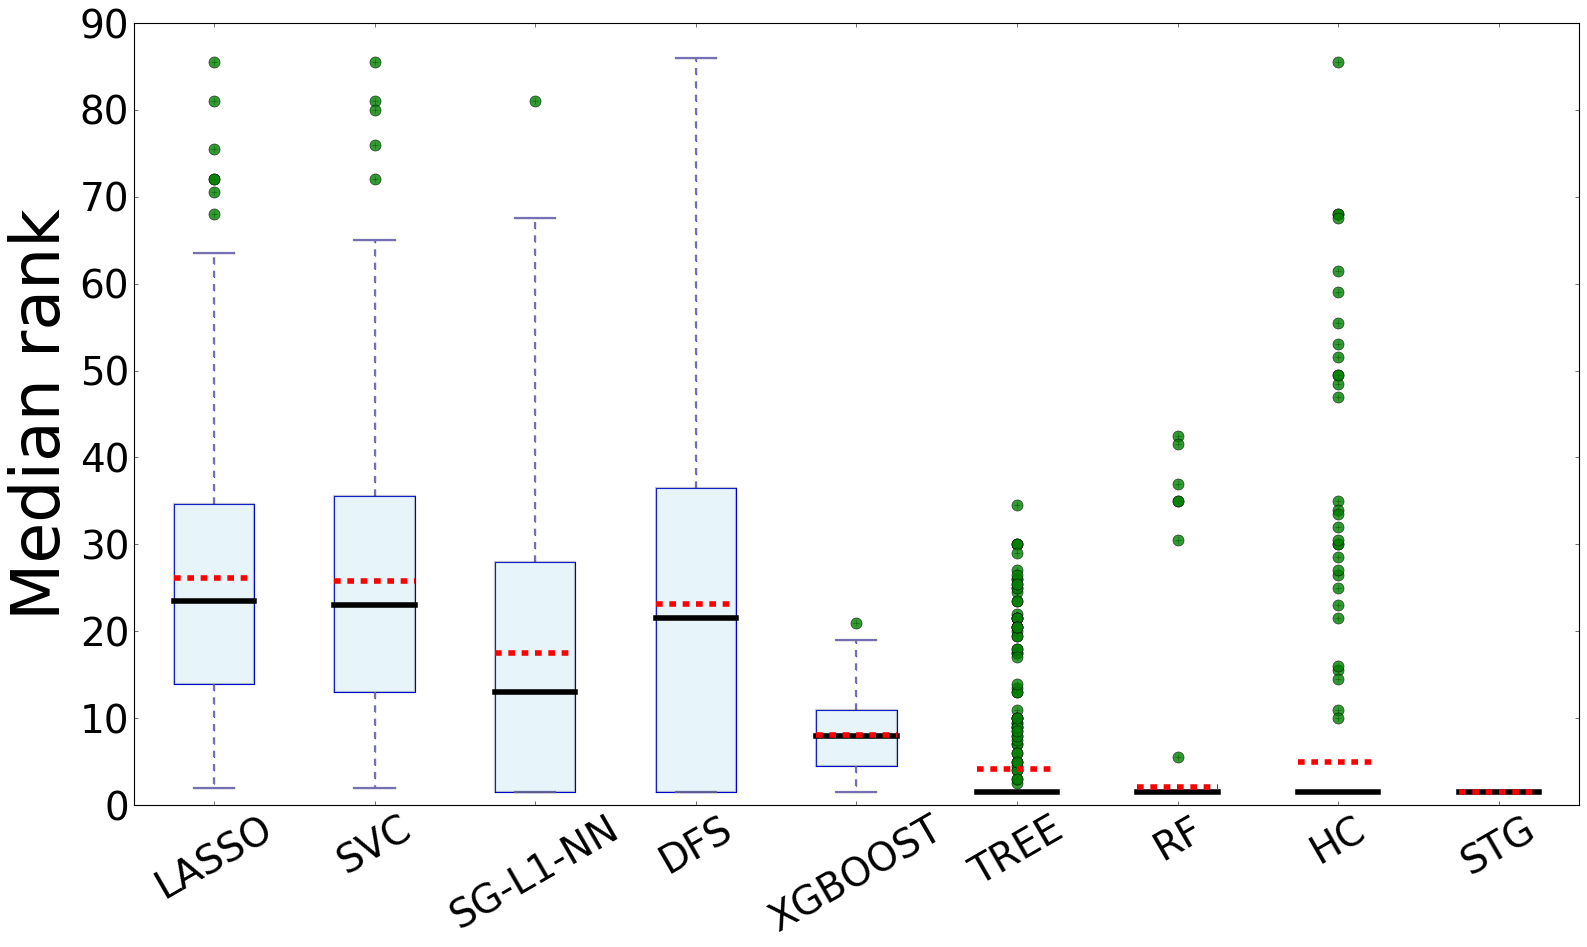

In [267]:
fig = plt.figure(1, figsize=(20, 12))
fig.patch.set_facecolor('w')
# Create an axes instance
ax = fig.add_subplot(111)
meanlineprops = dict(linestyle='--', linewidth=2, color='purple')
# Create the boxplot
bp = ax.boxplot(data_to_plot)
bp = ax.boxplot(data_to_plot, patch_artist=True,meanprops=meanlineprops, meanline=True,
               showmeans=True)


## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='k', linewidth=2)
    # change fill color
    box.set( facecolor = 'skyblue',alpha=0.2 )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for means in bp['means']:
    means.set(color='r', linewidth=5)
    
    
## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='k', linewidth=5)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='g', alpha=0.8,markersize=10)
ax.tick_params(labelsize=35)
ax.set_xticklabels(['LASSO', 'SVC','SG-L1-NN', 'DFS', 'XGBOOST', 'TREE', 'RF','HC','STG'])
plt.ylabel('Median rank',fontsize=60)
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('rank_XOR')